In [66]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [67]:
dataset = pd.read_csv("C:/Users/Jay/Documents/housing.csv")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [68]:
dataset.info()
#looks like total_bedrooms has some null values
#also, ocean_proximity is of type 'object'??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [69]:
dataset['ocean_proximity'].value_counts()
#ocean_proximity is a categorical value rather than a numerical one

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [70]:
dataset.describe()
#Is median_income on a weird scale?? Definitley not US dollars
#Ok so yeah, median_income is preprocesed where numbers are roughly tens of thousands of dollars (3.8 == $38,000 USD)
#There is a low and high cap for this category (0.499900 for lowset median and 15.000100 for highest median)
#NEED TO COME BACK TO THIS LATER

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


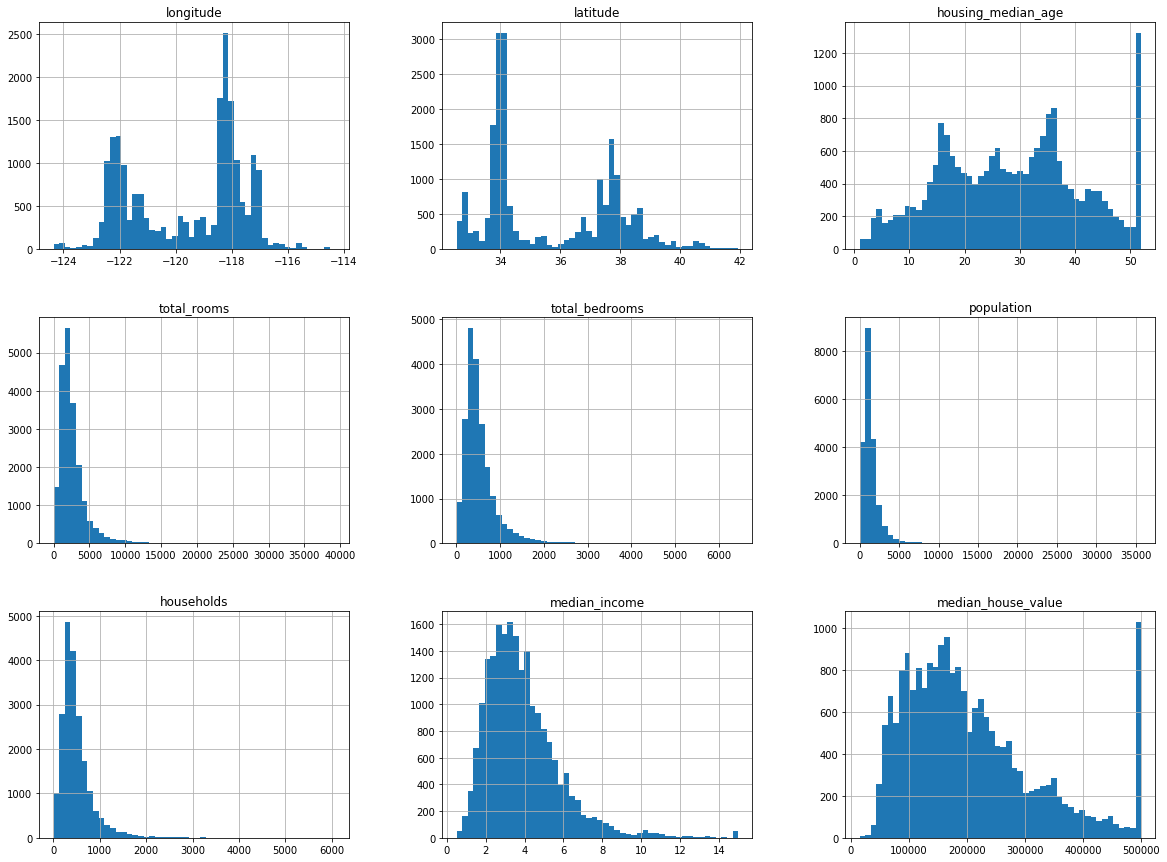

In [71]:
%matplotlib inline
dataset.hist(bins=50, figsize=(20,15))
plt.show()
#Housing_median_age and median_house_value are also capped (that's annoying)

In [72]:
corr_matrix = dataset.corr()
print(corr_matrix)
#median_house_value and median_income have a fair bit of correlation

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016AD1DCAFD0>,
      dtype=object)

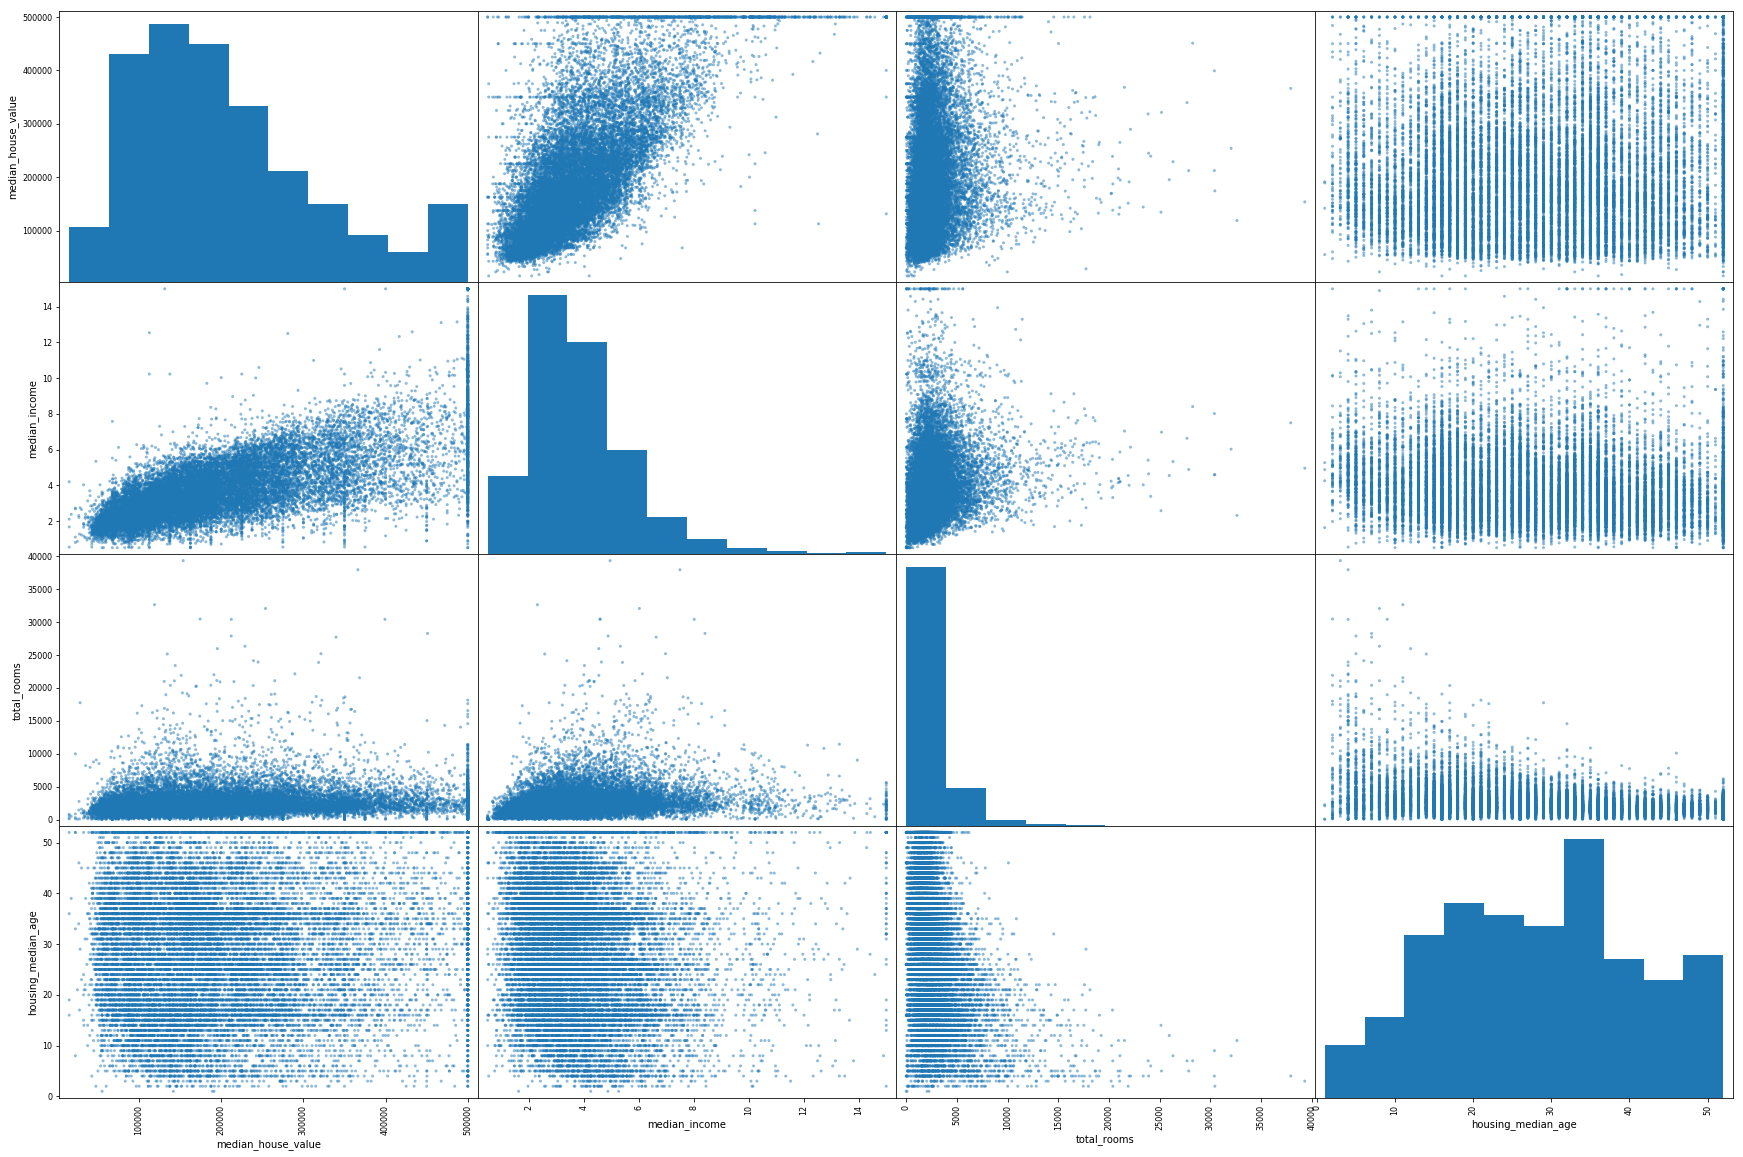

In [73]:
from pandas.plotting import scatter_matrix
attributes =["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(dataset[attributes],figsize=(30,20))

In [74]:
#transform for attribute combinations
dataset["rooms_per_household"] = dataset["total_rooms"]/dataset["households"]
dataset["bedrooms_per_room"] = dataset["total_bedrooms"]/dataset["total_rooms"]
dataset["population_per_household"] = dataset["population"]/dataset["households"]
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,6.281853,0.172096,2.181467


In [75]:
corr_matrix = dataset.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [76]:
#Clean up dataset by dropping missing na values (missing values are very small in proportion to size of dataset)
dataset = dataset.dropna(subset=["total_bedrooms"])
dataset.reset_index()
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,5.329513,0.219892,2.123209


In [77]:
#create dummy variables
dataset = pd.concat([dataset,pd.get_dummies(dataset['ocean_proximity'], prefix='ocean_proximity')],axis=1)
dataset.drop(['ocean_proximity'],axis = 1,inplace=True)
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,6.281853,0.172096,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,5.045455,0.224625,2.560606,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,6.114035,0.215208,3.122807,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,5.205543,0.215173,2.325635,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,5.329513,0.219892,2.123209,0,1,0,0,0


In [81]:
from sklearn.preprocessing import StandardScaler
dataset = StandardScaler().fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset,columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','rooms_per_household','bedrooms_per_room','population_per_household','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'])
dataset_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,0.625395,-1.146024,-0.049433,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,0.324942,-0.987254,-0.092134,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,1.150594,-1.440514,-0.025797,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,0.155467,-0.492925,-0.050162,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,0.342549,-0.706141,-0.085272,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492,-0.155420,0.199820,-0.048949,-0.890239,1.464744,-0.015645,-0.353524,-0.384186
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155,0.274959,0.037412,0.004912,-0.890239,1.464744,-0.015645,-0.353524,-0.384186
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477,-0.090943,0.036808,-0.071460,-0.890239,1.464744,-0.015645,-0.353524,-0.384186
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316,-0.041013,0.118204,-0.090853,-0.890239,1.464744,-0.015645,-0.353524,-0.384186


In [93]:
from sklearn.model_selection import train_test_split
x = dataset_scaled[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','rooms_per_household','bedrooms_per_room','population_per_household','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']]
y = dataset_scaled['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
 
# Fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train) 
 
# predicting the test set results
y_pred = regressor.predict(x_test)
  
print(y_pred)

[-0.23944837 -0.29511244 -0.70722181 ... -0.46991712  0.05156725
  0.33358609]


In [99]:
print("Training score:",regressor.score(x_train, y_train))
print("Test score:",regressor.score(x_test, y_test))


Training score: 0.6523864875545093
Test score: 0.6596651222166919
